In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

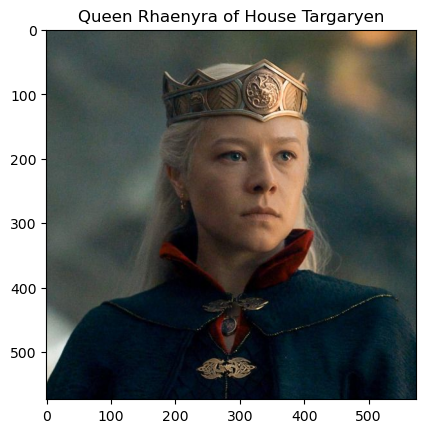

In [3]:
image = cv2.imread('Queen.jpg',cv2.IMREAD_COLOR)
image_reversed = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_reversed)
plt.title("Queen Rhaenyra of House Targaryen")
plt.axis('on')
plt.show()

Text(0.5, 1.0, 'Merged Output')

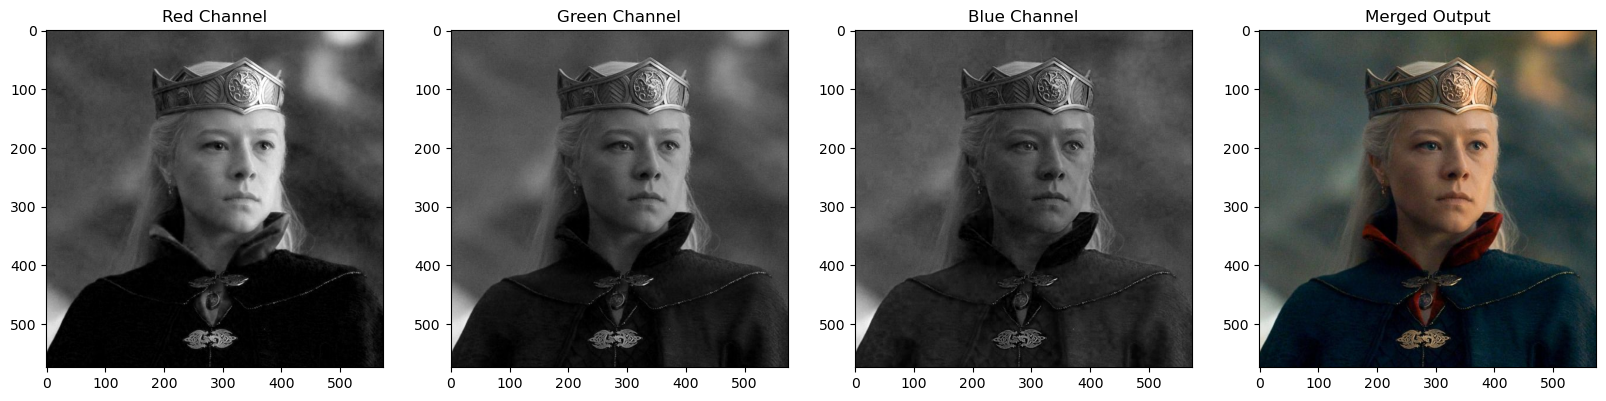

In [33]:
b, g, r = cv2.split(image)

plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

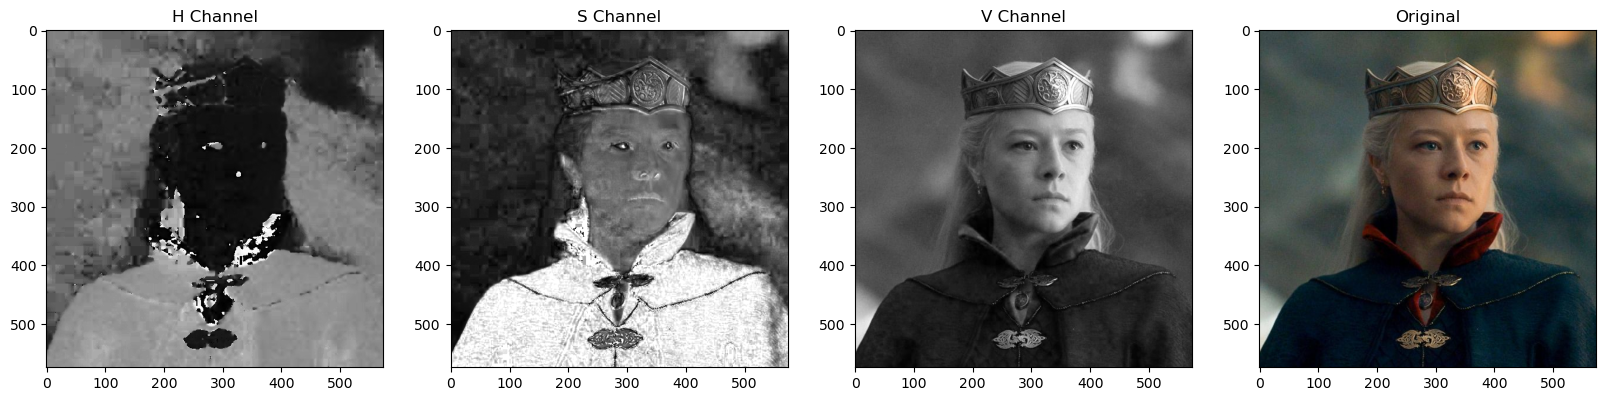

In [47]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));plt.title("Original");

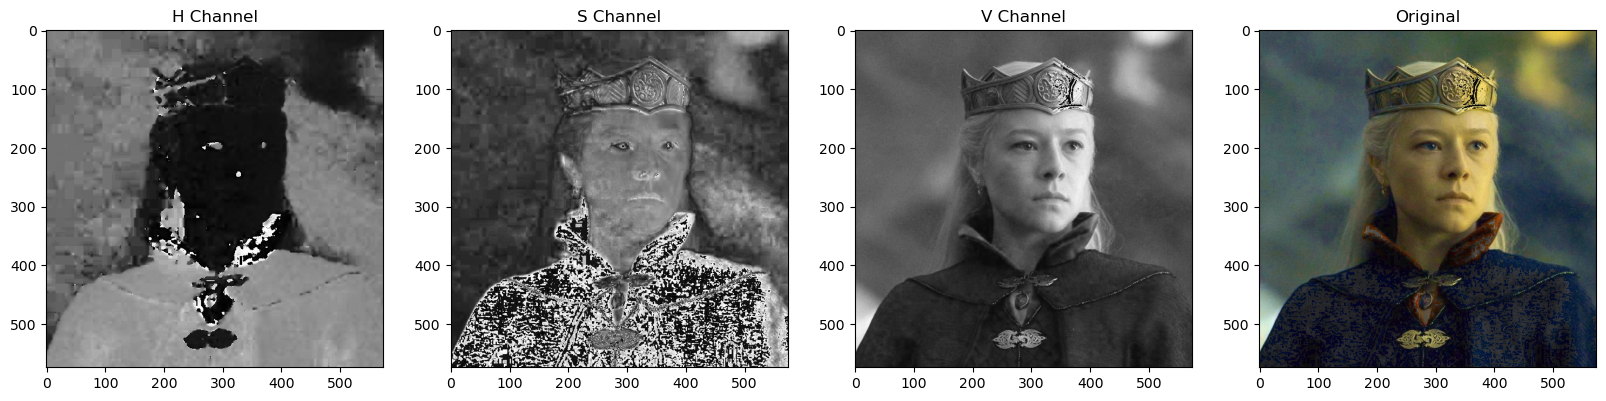

In [55]:
s_new = s + 20
v_new = v + 10
h_new = h + 10
img_queen_merged = cv2.merge((h_new, s_new, v_new))
img_queen_rgb = cv2.cvtColor(img_queen_merged, cv2.COLOR_HSV2RGB)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h_new, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s_new, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v_new, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_queen_rgb);   plt.title("Original");

In [63]:
print(f"Shape of given image is: {image.shape}")
print(f"Datatype of given image is: {image.dtype}") 
print(f"Pixel at given location (6,6) is: {image[6,6]}")

Shape of given image is: (574, 574, 3)
Datatype of given image is: uint8
Pixel at given location (6,6) is: [72 72 58]


In [ ]:
cropped_region = image[10:50, 20:70]
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(image, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized_cropped_region, cv2.COLOR_BGR2RGB))
plt.axis('off')

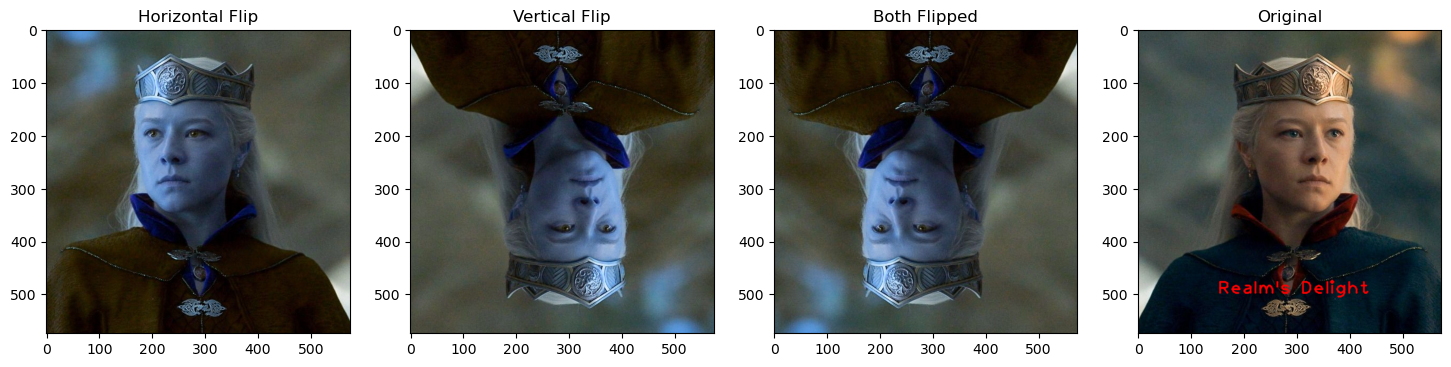

In [113]:
imageText = image.copy()
text = "Realm's Delight"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 0, 255)
fontThickness = 2

cv2.putText(imageText, text, (150, 500), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

img_queen_rgb_flipped_horz = cv2.flip(image, 1)
img_queen_rgb_flipped_vert = cv2.flip(image, 0)
img_queen_rgb_flipped_both = cv2.flip(image, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_queen_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_queen_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_queen_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(imageText[:,:,::-1]);plt.title("Original");

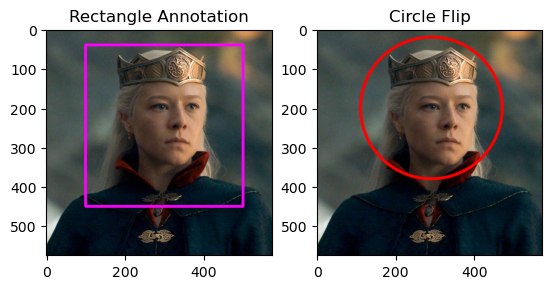

In [135]:
imageRectangle = image.copy()
imageCircle = image.copy()
cv2.rectangle(imageRectangle, (100, 40), (500, 450), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)
cv2.circle(imageCircle, (290,200), 180, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);
plt.subplot(121);plt.imshow(imageRectangle[:,:,::-1]);plt.title("Rectangle Annotation");
plt.subplot(122);plt.imshow(imageCircle[:,:,::-1]);plt.title("Circle Flip");

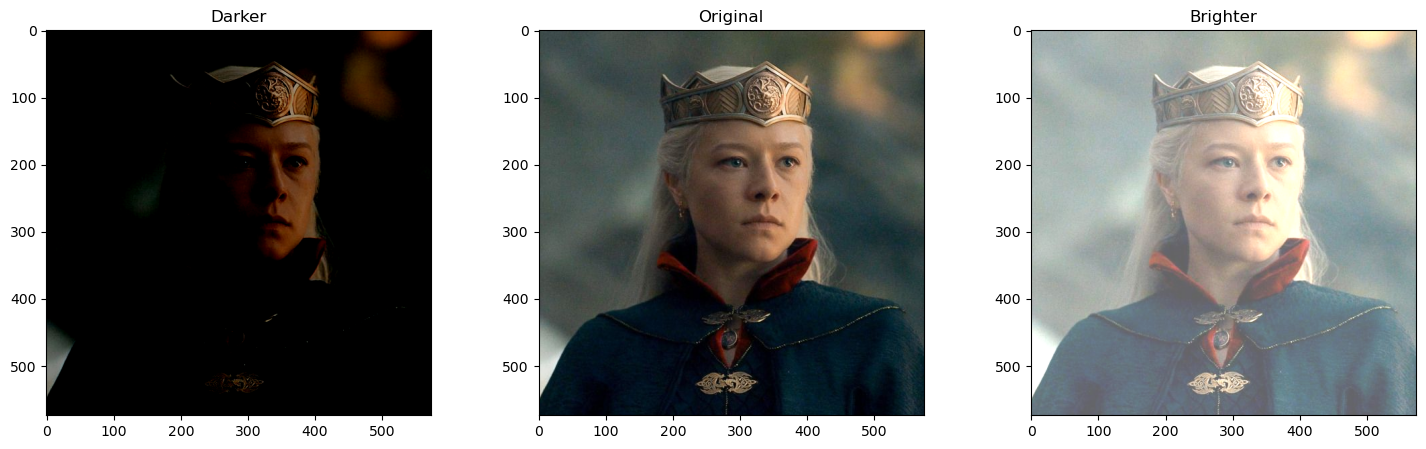

In [13]:
image_rgb = image[:,:,::-1]
matrix = np.ones(image_rgb.shape, dtype='uint8')*100
brighter_image = cv2.add(image_rgb, matrix)
darker_image = cv2.subtract(image_rgb, matrix)
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(darker_image);  plt.title("Darker");
plt.subplot(132); plt.imshow(image_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(brighter_image);plt.title("Brighter");

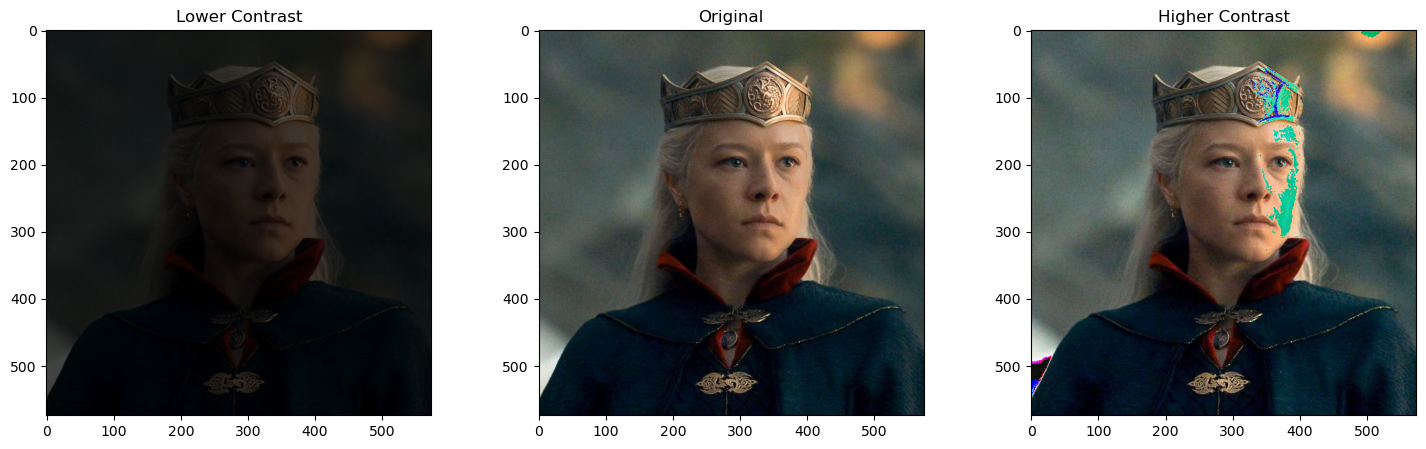

In [23]:
matrix1 = np.ones(image_rgb.shape)*0.3
matrix2 = np.ones(image_rgb.shape)*1.2
image_darker = np.uint8(cv2.multiply(np.float64(image_rgb),matrix1))
image_brighter = np.uint8(cv2.multiply(np.float64(image_rgb),matrix2))
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(image_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(image_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(image_brighter);plt.title("Higher Contrast");

Text(0.5, 1.0, 'Higher Contrast after fixing issue')

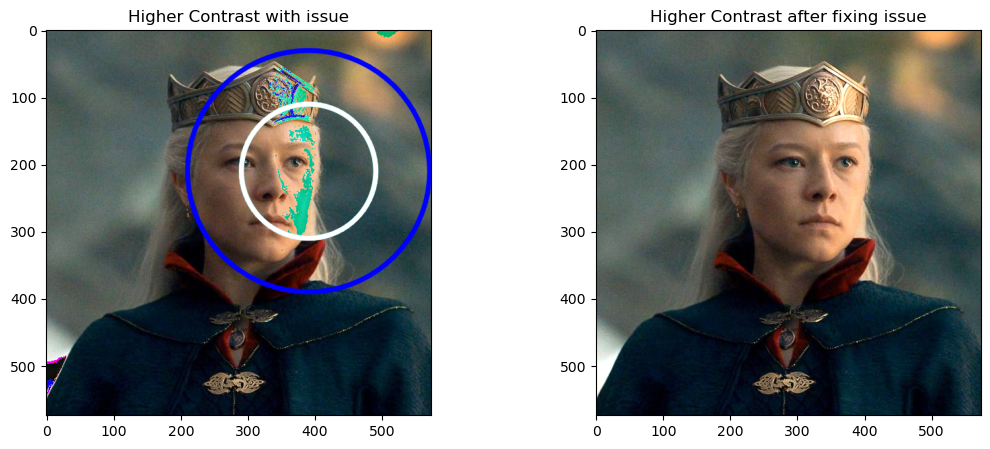

In [37]:
# The issue is that after multiplying, the values which are already high, 
# are becoming greater than 255. Thus, the overflow issue.
plt.figure(figsize=[13,5])
cv2.circle(image_brighter, (390,210), 100, (255, 255, 255), thickness=5, lineType=cv2.LINE_AA);
image_brighter_fixed = np.uint8(np.clip(cv2.multiply(np.float64(image_rgb), matrix2),0,255))
plt.subplot(121);plt.imshow(image_brighter);plt.title("Higher Contrast with issue")
plt.subplot(122);plt.imshow(image_brighter_fixed);plt.title("Higher Contrast after fixing issue")

(574, 574)


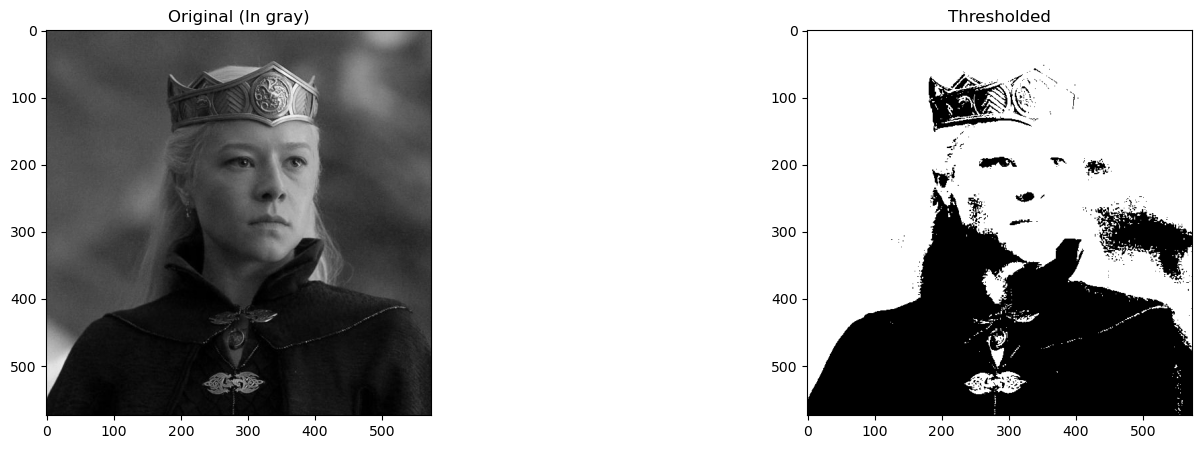

In [49]:
image_grayscale = cv2.imread('queen.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(image_grayscale, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(image_grayscale, cmap="gray");  plt.title("Original (In gray)")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

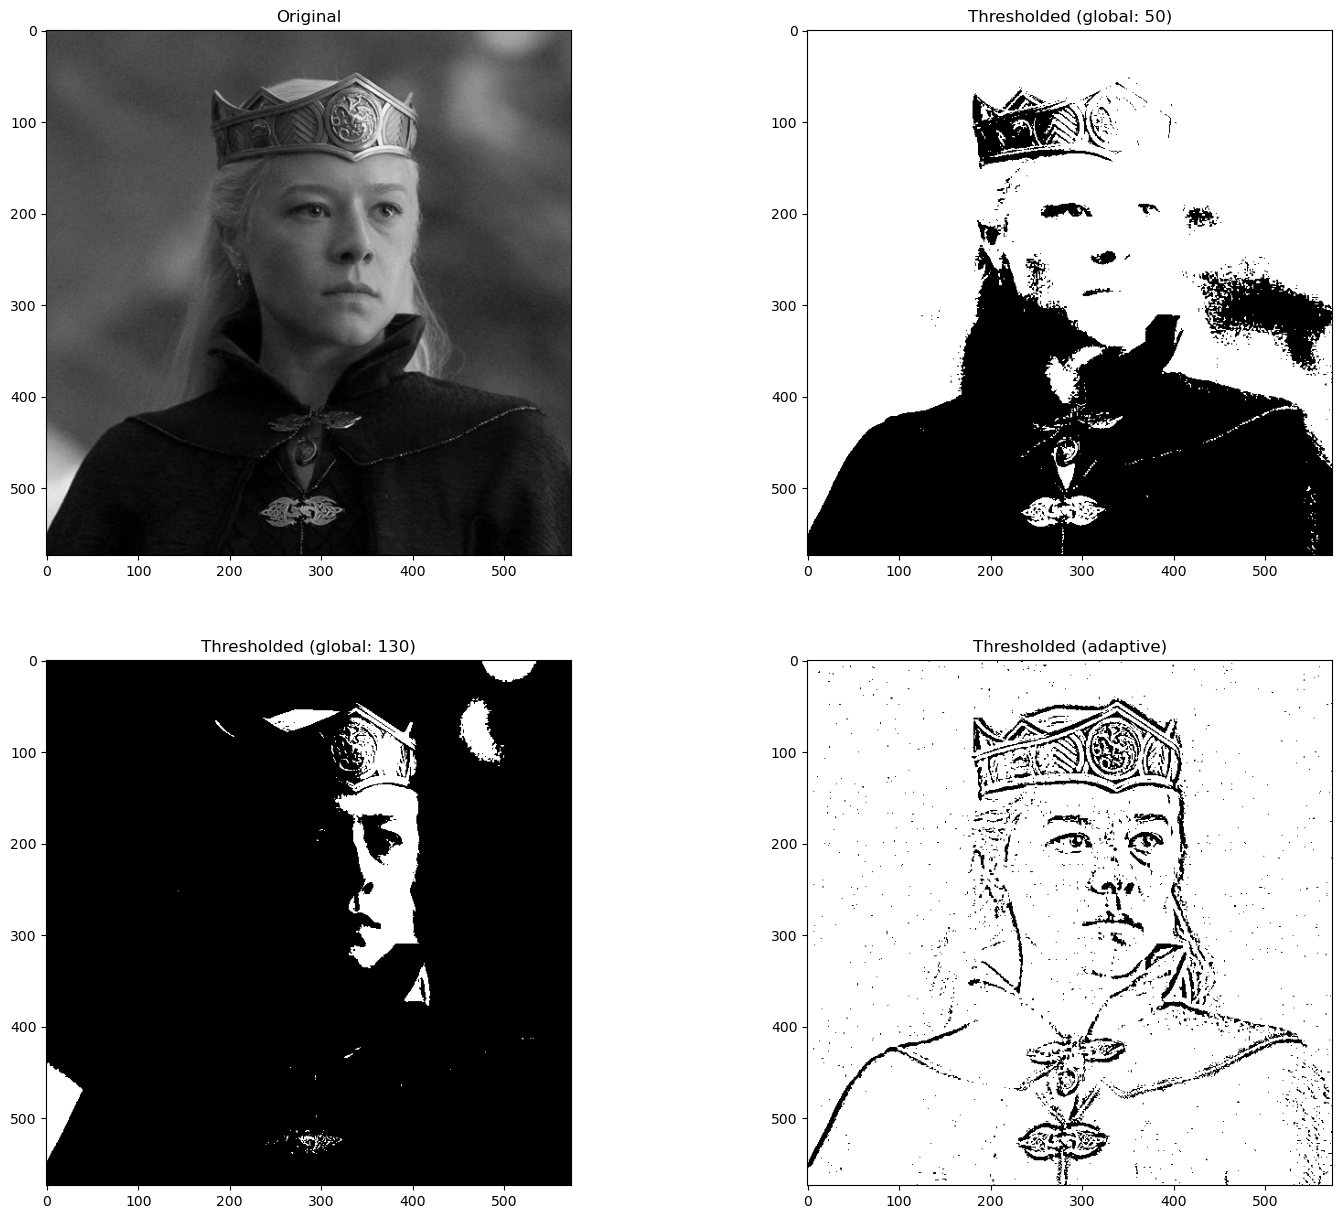

In [51]:
retval, img_thresh_gbl_1 = cv2.threshold(image_grayscale, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv2.threshold(image_grayscale, 130, 255, cv2.THRESH_BINARY)
img_thresh_adp = cv2.adaptiveThreshold(image_grayscale, 255, 
                                       cv2.ADAPTIVE_THRESH_MEAN_C, 
                                       cv2.THRESH_BINARY, 11, 7)
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(image_grayscale, cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray");  plt.title("Thresholded (adaptive)");

In [59]:
# Then we have some bitwise operations, such as:
# 1. cv2.bitwise_and()
# 2. cv2.bitwise_or()
# 3. cv2.bitwise_not()

# Reading your laptop camera
source = cv2.VideoCapture(0)

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

while cv2.waitKey(1) != 27:
    has_frame, frame = source.read()
    if not has_frame:
        break
    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)

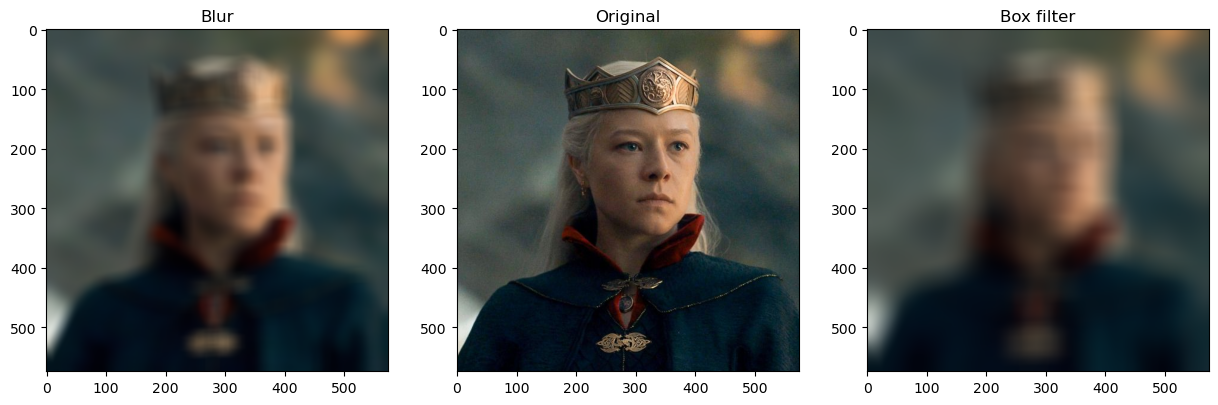

In [44]:
kernel_size = (50, 50)
ddepth = -1 
normalized = True

output_imagee = cv2.boxFilter(image_reversed, ddepth, kernel_size, normalize=normalized)
output_kernel = cv2.blur(image_reversed,(25,25))
plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(output_kernel);plt.title('Blur')
plt.subplot(132);plt.imshow(image_reversed);plt.title('Original')
plt.subplot(133);plt.imshow(output_imagee);plt.title("Box filter")

#plt.axis('off')
plt.show()

(-0.5, 573.5, 573.5, -0.5)

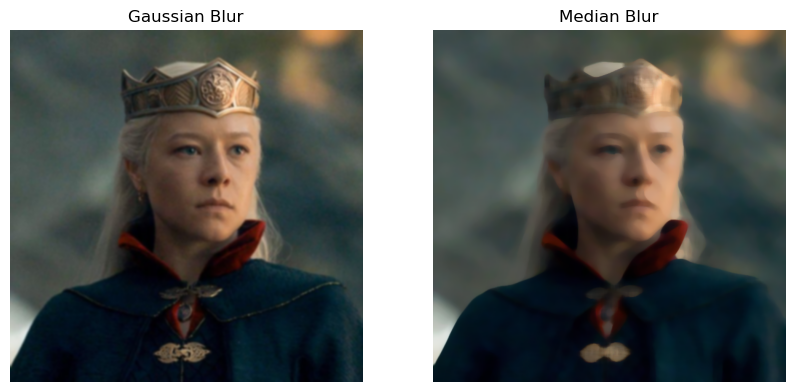

In [76]:
output_gaussian_blur = cv2.GaussianBlur(image_reversed, (7,7),0)
output_medium_blur = cv2.medianBlur(image_reversed, 13)
plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(output_gaussian_blur)
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(122)
plt.imshow(output_medium_blur)
plt.title("Median Blur")
plt.axis('off')

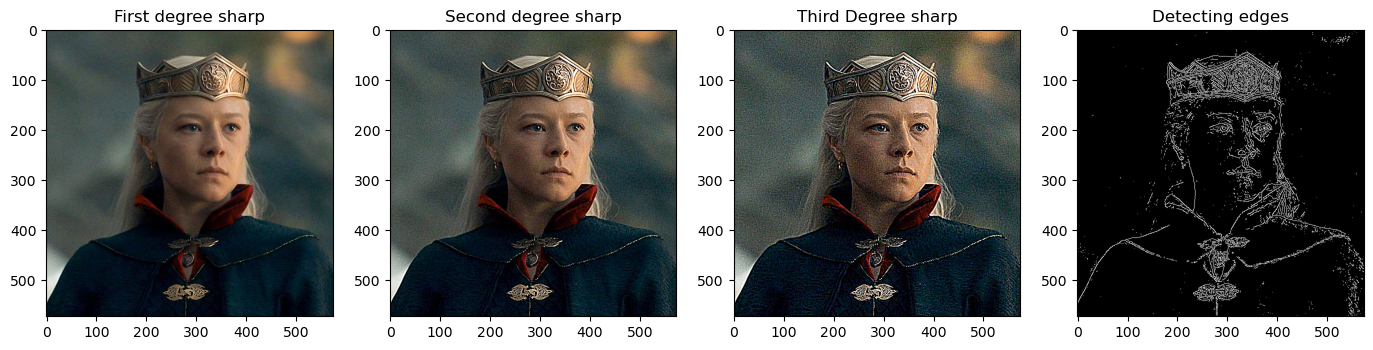

In [87]:
sharp1 = cv2.addWeighted(image_reversed, 1.5, output_gaussian_blur, -0.5, 0)
sharp2 = cv2.addWeighted(image_reversed, 3.5, output_gaussian_blur, -2.5, 0)
sharp3 = cv2.addWeighted(image_reversed, 7.5, output_gaussian_blur, -6.5, 0)
edges = cv2.Canny(image_reversed, threshold1=70, threshold2=70)
plt.figure(figsize=[17,5])
plt.subplot(141);plt.imshow(sharp1);plt.title('First degree sharp')
plt.subplot(142);plt.imshow(sharp2);plt.title('Second degree sharp')
plt.subplot(143);plt.imshow(sharp3);plt.title("Third Degree sharp")
plt.subplot(144);plt.imshow(edges, cmap='grey');plt.title('Detecting edges');plt.show()

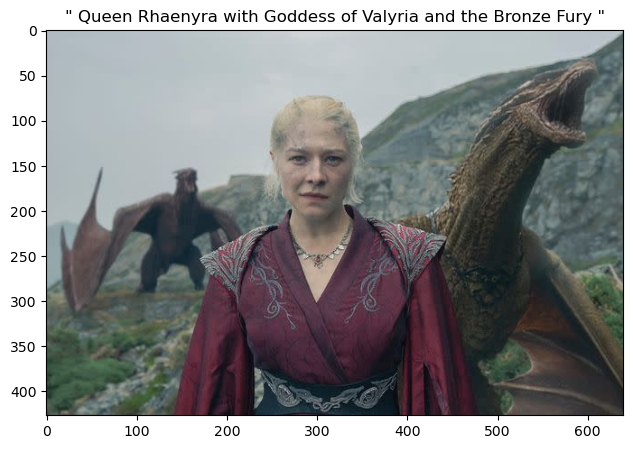

In [21]:
second_image = cv2.imread('queen2.jpeg', cv2.IMREAD_COLOR)
second_image_rgb = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[30,5])
plt.imshow(second_image_rgb)
plt.title("\" Queen Rhaenyra with Goddess of Valyria and the Bronze Fury \"")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13576\3360164232.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


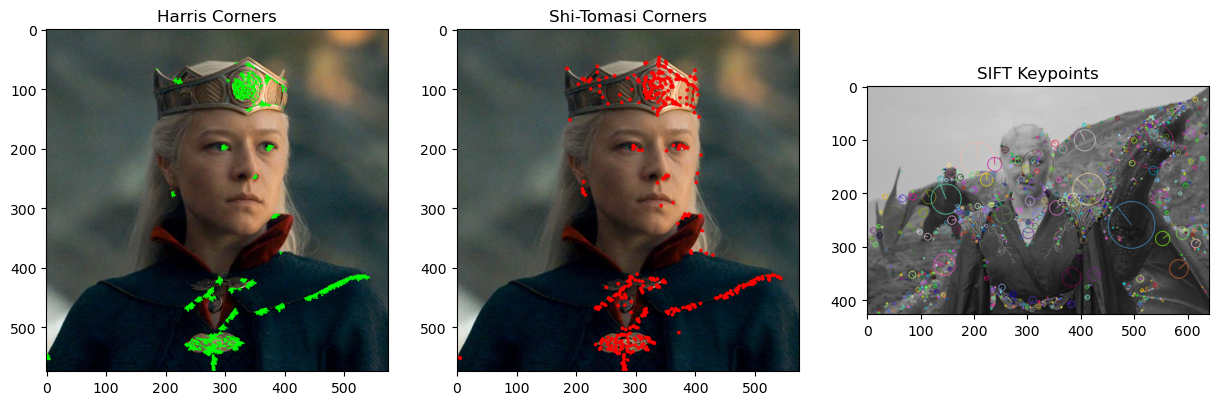

In [136]:
# Harris corner detection.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
gray_image = np.float32(gray_image) 
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04) 
#dst = cv2.dilate(dst, None) 
#image[dst > 0.01 * dst.max()] = [0, 255, 0] 


# Shi-tomasi Detection
corners = cv2.goodFeaturesToTrack(gray_image, 150, 0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(image_reversed, (x,y),3,255,-1)
# SIFT Keypoints
gray_hiha= cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY) 
sift = cv2.SIFT_create()
keypoints = sift.detect(gray_hiha, None)
draw = cv2.drawKeypoints(gray_hiha, keypoints,None,
                        flags= cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[15, 5])
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.subplot(132)
plt.imshow(image_reversed, cmap='gray')
plt.title('Shi-Tomasi Corners')
plt.subplot(133)
plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

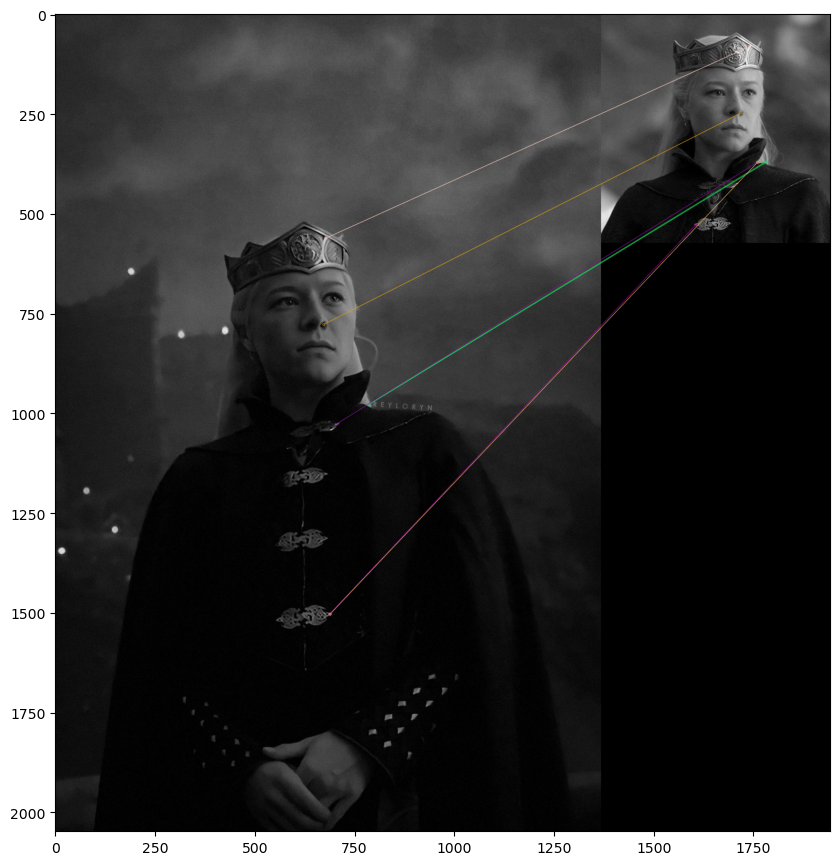

In [10]:
img1 = cv2.imread('queen3.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Queen.jpg',cv2.IMREAD_GRAYSCALE)
 
orb = cv2.ORB_create()
 
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
 
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
 
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:7],None,
                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=[10,15])
plt.imshow(img3);plt.show();